In [ ]:
ffrom google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from PIL import Image

In [ ]:
def load_images_from_folder(folder):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img = Image.open(os.path.join(folder, filename)).convert('L')  # Convert to grayscale
        if img is not None:
            img = img.resize((100, 100))  # Resize images to a common shape
            images.append(np.array(img))
            if folder.endswith('/Bacterialblight'):
                labels.append('Bacterialblight')
            elif folder.endswith('/Brownspot'):
                labels.append('Brownspot')
            elif folder.endswith('/Leafsmut'):
                labels.append('Leafsmut')
            else:
                labels.append('unknown')  # If folder doesn't match any expected label
    return images, labels

In [ ]:
folder_paths = ['/content/drive/My Drive/Bacterialblight', '/content/drive/My Drive/Brownspot', '/content/drive/My Drive/Leafsmut']
images = []
all_labels = []
for folder_path in folder_paths:
    folder_images, folder_labels = load_images_from_folder(folder_path)
    images.extend(folder_images)
    all_labels.extend(folder_labels)

In [ ]:
X = np.array(images)
y = np.array(all_labels)

In [ ]:
X = X.astype('float32') / 255.0
X = X.reshape(X.shape[0], 100, 100, 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
label_encoder = LabelEncoder()

# Fit and transform the string labels to numeric values
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [ ]:
X_train.shape, y_train.shape

((3756, 100, 100, 1), (3756,))

In [ ]:
X_test.shape, y_test.shape

((939, 100, 100, 1), (939,))

In [ ]:
X_train

array([[[[0.23921569],
         [0.14901961],
         [0.18431373],
         ...,
         [0.5803922 ],
         [0.5568628 ],
         [0.5647059 ]],

        [[0.3254902 ],
         [0.24313726],
         [0.2       ],
         ...,
         [0.6627451 ],
         [0.67058825],
         [0.6784314 ]],

        [[0.3372549 ],
         [0.3529412 ],
         [0.34901962],
         ...,
         [0.6745098 ],
         [0.67058825],
         [0.67058825]],

        ...,

        [[0.45882353],
         [0.45490196],
         [0.4       ],
         ...,
         [0.92156863],
         [0.9098039 ],
         [0.84313726]],

        [[0.45882353],
         [0.47058824],
         [0.49019608],
         ...,
         [0.93333334],
         [0.9137255 ],
         [0.9098039 ]],

        [[0.30980393],
         [0.36078432],
         [0.3882353 ],
         ...,
         [0.92156863],
         [0.94509804],
         [0.9490196 ]]],


       [[[0.17254902],
         [0.17254902],
         [0.17

In [ ]:
X_train[0]

array([[[0.23921569],
        [0.14901961],
        [0.18431373],
        ...,
        [0.5803922 ],
        [0.5568628 ],
        [0.5647059 ]],

       [[0.3254902 ],
        [0.24313726],
        [0.2       ],
        ...,
        [0.6627451 ],
        [0.67058825],
        [0.6784314 ]],

       [[0.3372549 ],
        [0.3529412 ],
        [0.34901962],
        ...,
        [0.6745098 ],
        [0.67058825],
        [0.67058825]],

       ...,

       [[0.45882353],
        [0.45490196],
        [0.4       ],
        ...,
        [0.92156863],
        [0.9098039 ],
        [0.84313726]],

       [[0.45882353],
        [0.47058824],
        [0.49019608],
        ...,
        [0.93333334],
        [0.9137255 ],
        [0.9098039 ]],

       [[0.30980393],
        [0.36078432],
        [0.3882353 ],
        ...,
        [0.92156863],
        [0.94509804],
        [0.9490196 ]]], dtype=float32)

In [ ]:
y_train_encoded[0]

0

In [ ]:
class_labels = ['Bacterialblight','Brownspot','Leafsmut']

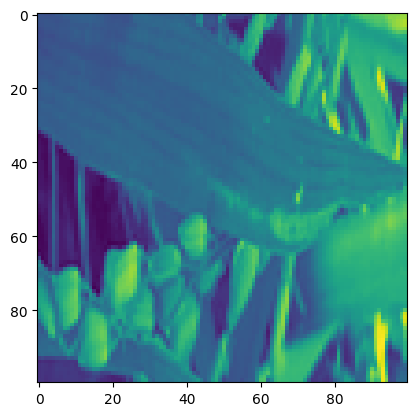

In [ ]:
plt.imshow(X_train[15])

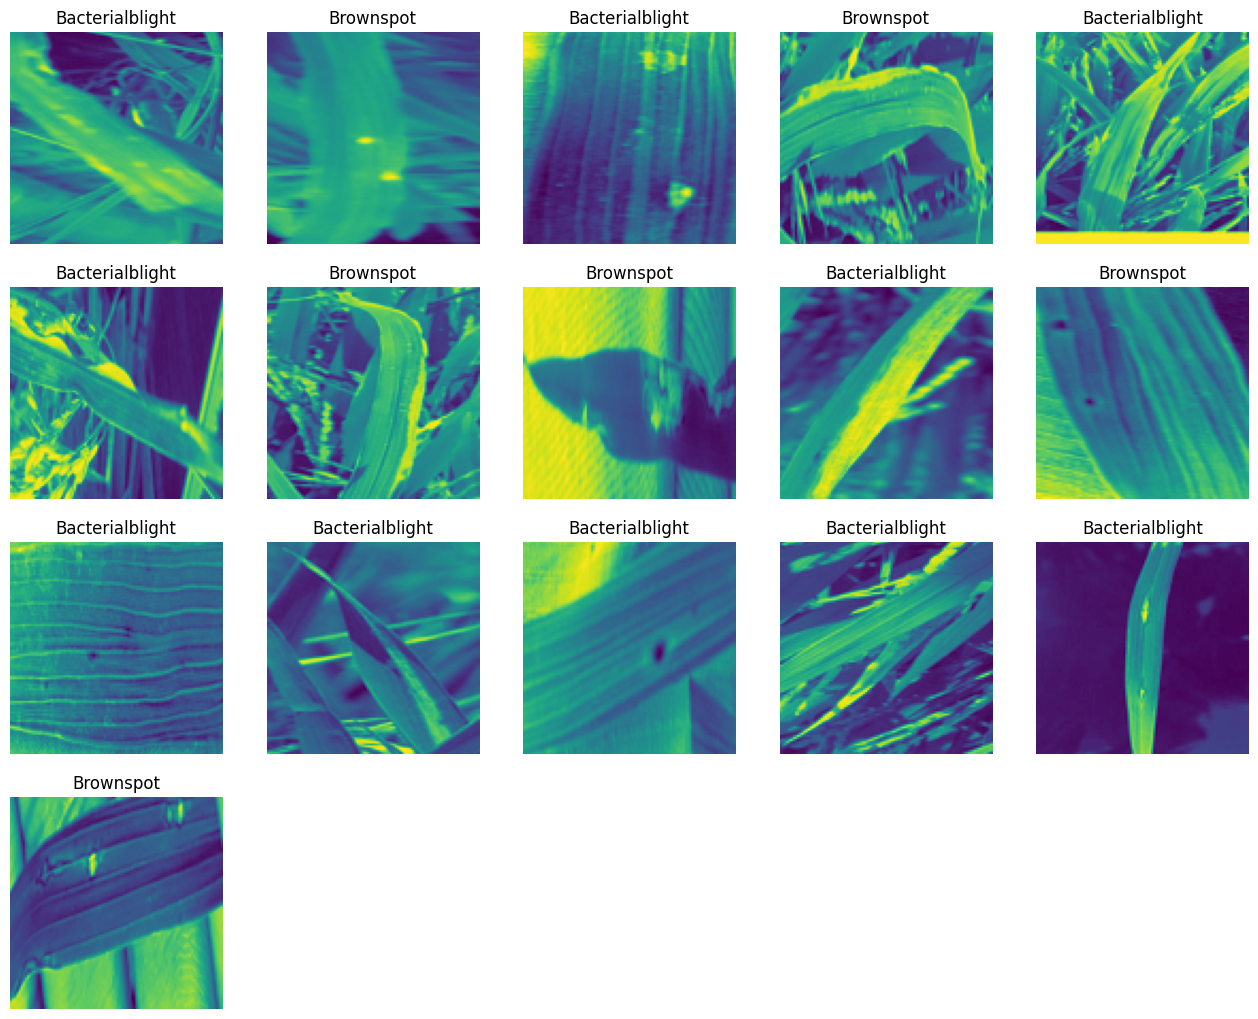

In [ ]:
plt.figure(figsize = (16,16))
j = 1

for i in np.random.randint(0,3000, 16):
  plt.subplot(5,5,j);j+=1
  plt.imshow(X_train[i])
  plt.axis('off')
  plt.title(y[i])



In [ ]:
import keras
import tensorflow.keras

In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=64, kernel_size=3, strides=(1, 1), padding='valid', input_shape=(100, 100, 1)),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(filters=128, kernel_size=3, strides=(2, 2), padding='valid'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2, 2), padding='valid'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu',input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(units=256, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=256, activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.10),
    keras.layers.Dense(units=10, activation='softmax')
])

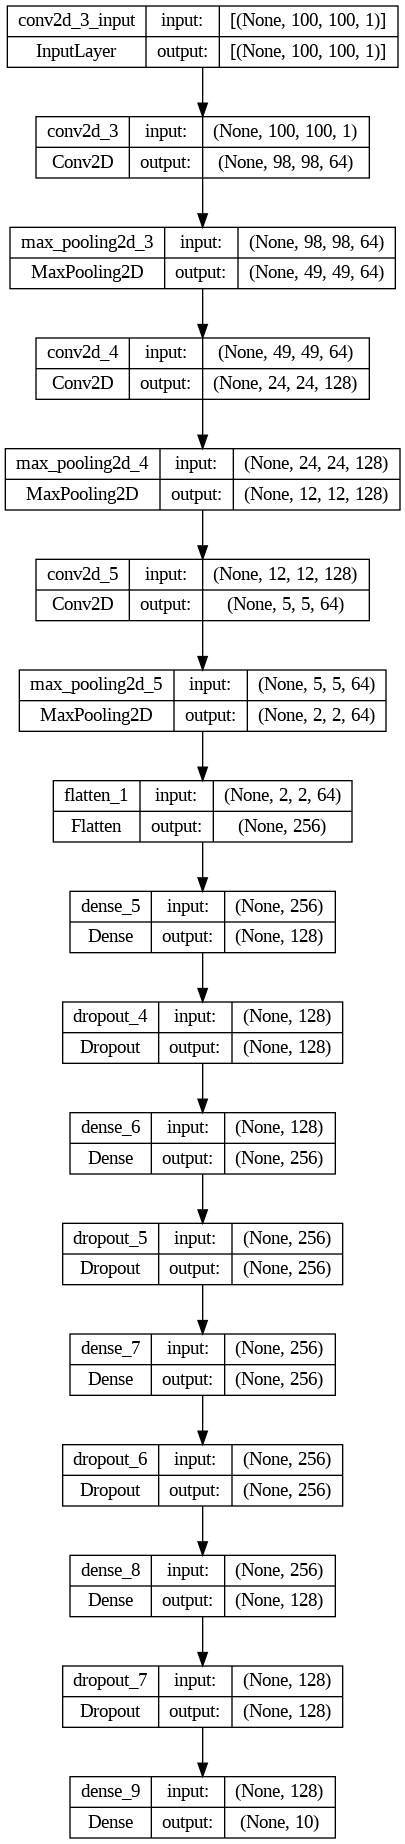

In [ ]:
keras.utils.plot_model(model, to_file = 'model_plot.png', show_shapes = True, show_layer_names = True)

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 98, 98, 64)        640       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 49, 49, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 128)       73856     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 12, 12, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 5, 5, 64)          73792     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 2, 2, 64)         

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
y_train_encoded.shape

(3756,)

In [ ]:
model.fit(X_train,y_train_encoded, epochs = 20, batch_size = 90, verbose = 1, validation_data = (X_test,y_test_encoded))

Epoch 1/20
42/42 [==============================] - 70s 2s/step - loss: 1.2413 - accuracy: 0.3634 - val_loss: 1.0110 - val_accuracy: 0.4728
Epoch 2/20
42/42 [==============================] - 68s 2s/step - loss: 0.9382 - accuracy: 0.5626 - val_loss: 0.8451 - val_accuracy: 0.5921
Epoch 3/20
42/42 [==============================] - 74s 2s/step - loss: 0.8342 - accuracy: 0.6278 - val_loss: 0.8018 - val_accuracy: 0.6347
Epoch 4/20
42/42 [==============================] - 72s 2s/step - loss: 0.7745 - accuracy: 0.6701 - val_loss: 0.7249 - val_accuracy: 0.6869
Epoch 5/20
42/42 [==============================] - 74s 2s/step - loss: 0.6778 - accuracy: 0.7215 - val_loss: 0.6237 - val_accuracy: 0.7359
Epoch 6/20
42/42 [==============================] - 68s 2s/step - loss: 0.6164 - accuracy: 0.7391 - val_loss: 0.6015 - val_accuracy: 0.7455
Epoch 7/20
42/42 [==============================] - 68s 2s/step - loss: 0.5366 - accuracy: 0.7793 - val_loss: 0.5524 - val_accuracy: 0.7838
Epoch 8/20
42/42 [==

In [ ]:
model.predict(np.expand_dims(X_test[0],axis = 0)).round(2)

1/1 [==============================] - 0s 150ms/step


array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
np.argmax(model.predict(np.expand_dims(X_test[0],axis = 0)).round(2))

1/1 [==============================] - 0s 39ms/step


0

In [ ]:
y_test_encoded[0]

0

In [ ]:
y_pred = model.predict(X_test).round(2)
y_pred

30/30 [==============================] - 7s 253ms/step


array([[1.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.66, 0.34, ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.95, 0.05, ..., 0.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ]], dtype=float32)

In [ ]:
model.evaluate(X_test,y_test_encoded)

30/30 [==============================] - 5s 153ms/step - loss: 0.1762 - accuracy: 0.9563


[0.17620079219341278, 0.9563365578651428]

<Axes: >

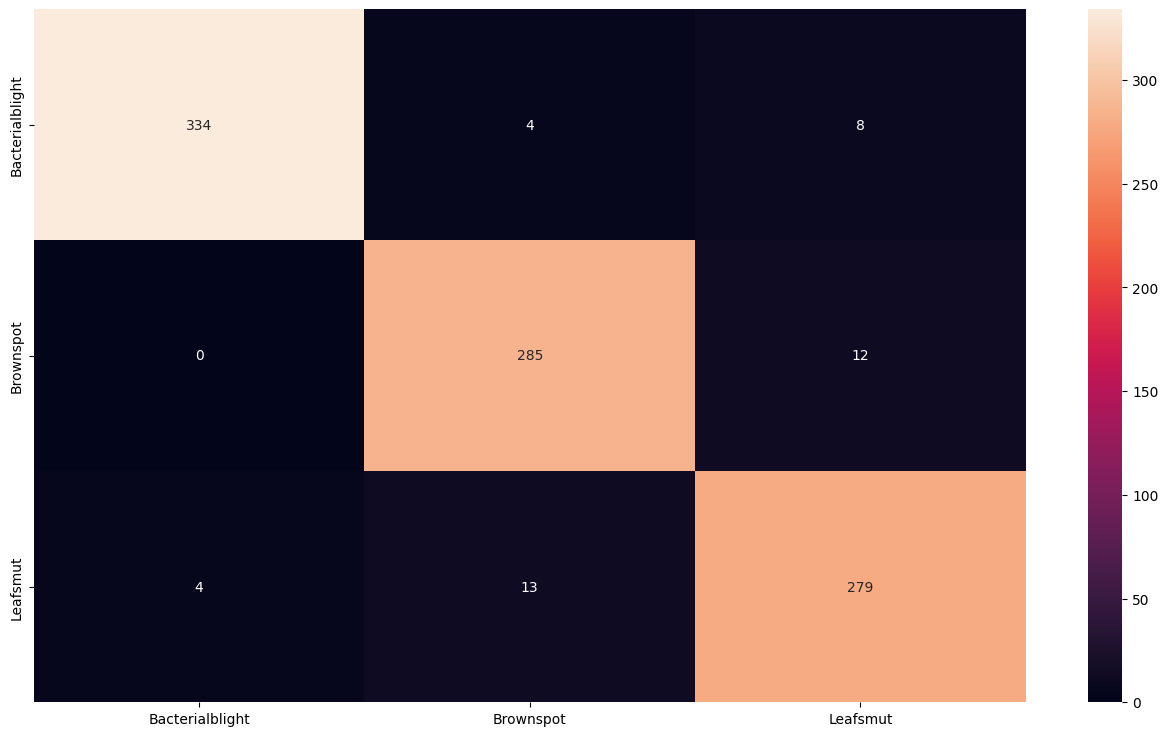

In [ ]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize = (16,9))

y_pred_labels = [np.argmax(label) for label in y_pred]
cm = confusion_matrix(y_test_encoded, y_pred_labels)
sns.heatmap(cm, annot = True, fmt = 'd', xticklabels = class_labels, yticklabels = class_labels)

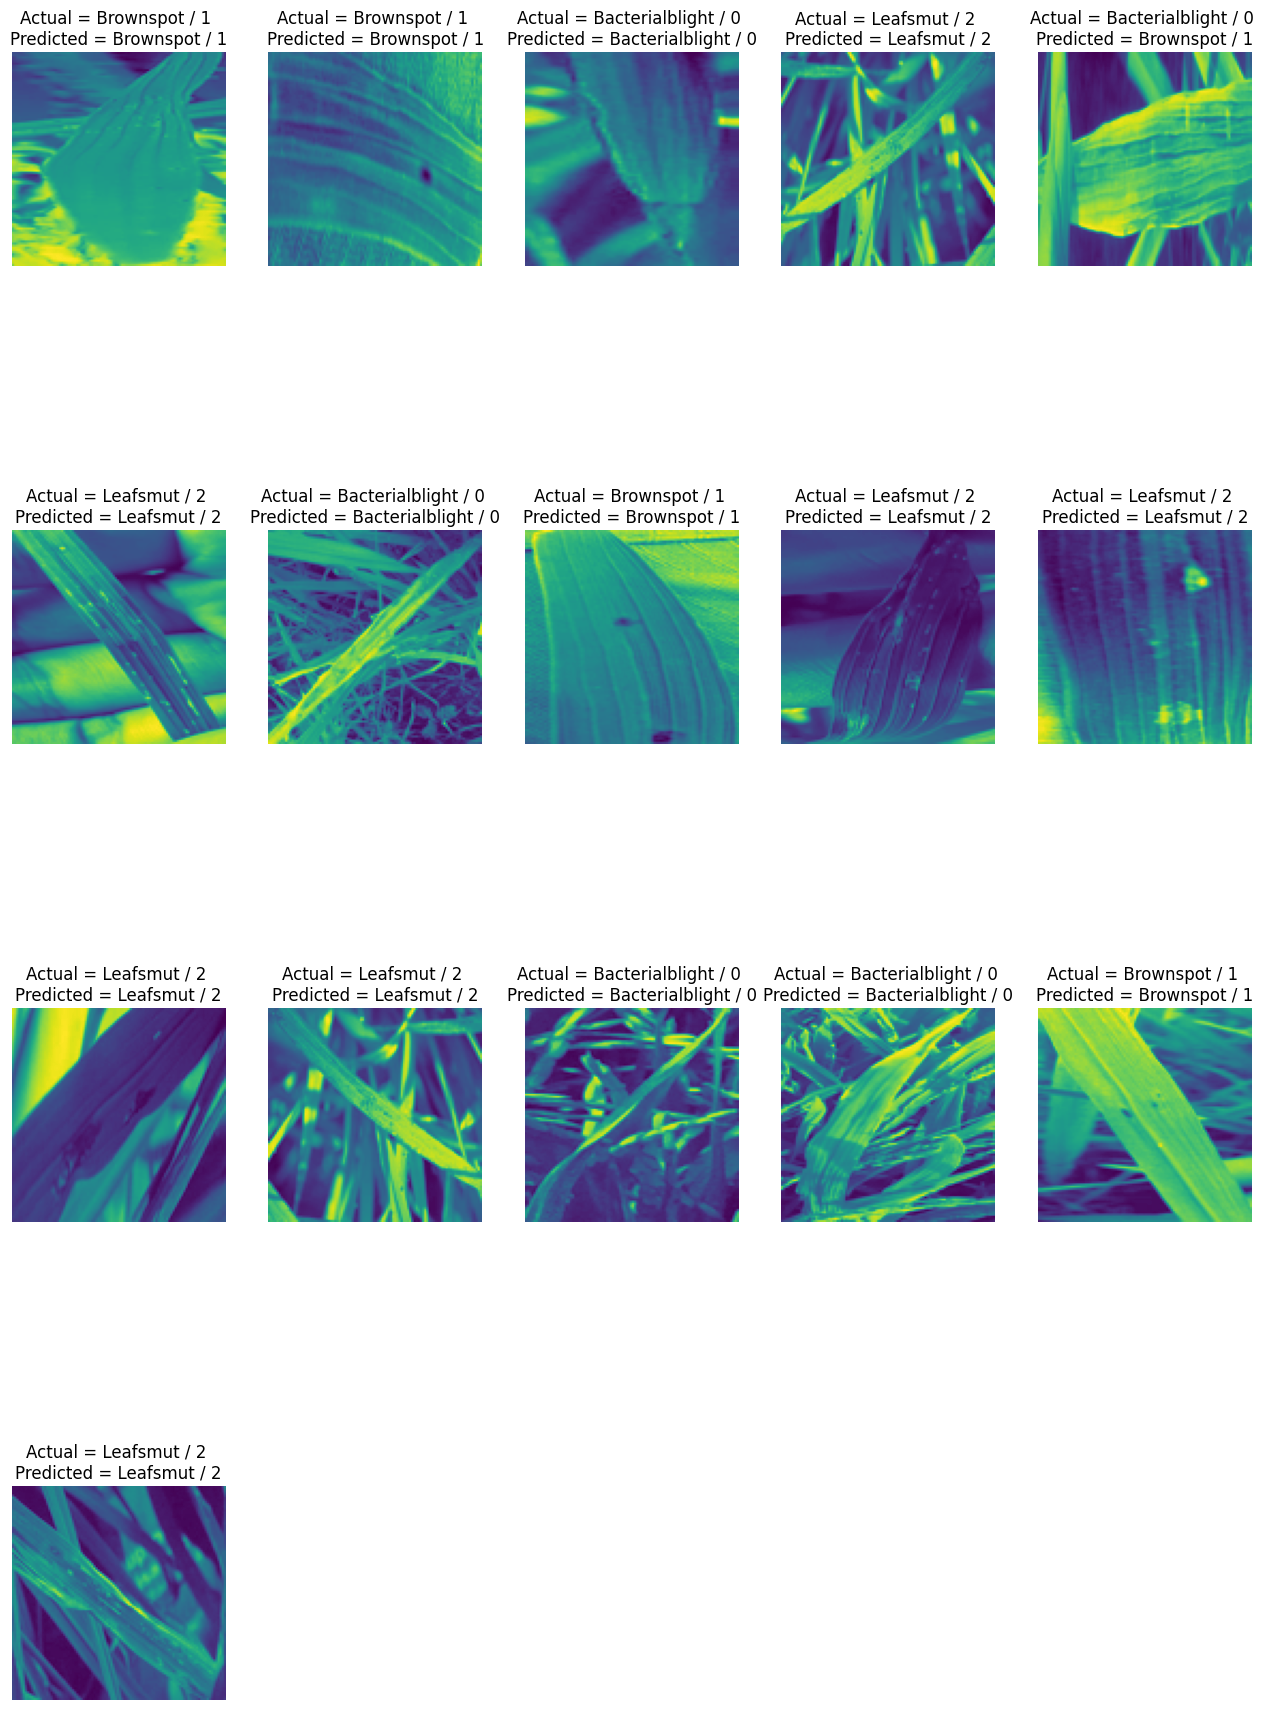

In [ ]:
plt.figure(figsize = (16,30))
j = 1

for i in np.random.randint(0,len(X_test), 16):
  plt.subplot(5,5,j);j+=1
  plt.imshow(X_test[i])
  plt.axis('off')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test_encoded[i]], y_test_encoded[i], class_labels[np.argmax(y_pred[i])], np.argmax(y_pred[i])))